# Sin Wave

## Loading Packages

In [6]:
import os

In [1]:
from deeplearning import *
from models import *
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pickle
from preprocessing import *
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from eval_inspect import *
import warnings

warnings.filterwarnings("ignore")
torch.nn.Module.dump_patches = True

set_seed(42)

True

### Insuring that training is done on GPU if available

In [2]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

No GPU available!


# Multivariate

## Generating Data

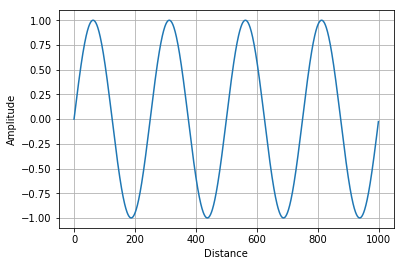

In [3]:
frequency = 4
sample_rate = 1000
x = np.arange(sample_rate)
y_1 = np.sin(2 * np.pi * frequency * x / sample_rate)
y_1 = np.sin(2 * np.pi * frequency * x / sample_rate)

plt.plot(x, y_1, label="Signal 1")
plt.plot(x, y_1, label="Signal 1")
plt.xlabel('Distance')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [197]:
data_X = np.stack((y_1, y_2))
data_X = data_X.reshape(data_X.shape[1], data_X.shape[0])
data_X.shape

(5000, 2)

### Split into train and target

In [198]:
forecast_length = 5
data_X = data_X[:-forecast_length]
data_y = target[forecast_length:]

data_y = data_y.reshape(len(data_y), 1)

print("Data X shape", data_X.shape,
      "\nData y shape", data_y.shape)

Data X shape (4995, 2) 
Data y shape (4995, 1)


### Chunking Data

In [199]:
series_length = 60
data_X, data_y = slice_series(data_X, data_y, series_length, dataset_pct=1.0)

# [Number of series, time series length, number of features]
print("Data X shape", data_X.shape,
      "\nData y shape", data_y.shape)

Data X shape (4935, 60, 2) 
Data y shape (4935, 1)


### Hyperparameters

In [210]:
learning_rate = 1e-2
momentum = 0.5
weight_decay = 1e-4

# Batch Parameters
batch_size = 32

# Training Parameters
n_epochs = 1000
patience = 1000
disp_freq= 10
fig_disp_freq= 10


# Model Parameters
num_features = data_X.shape[2]
hidden_dim = 8
dense_hidden = 16
num_layers = 1
output_dim = 1
dropout = 0.0

In [211]:
model = LSTM(num_features=num_features, 
             hidden_dim=hidden_dim,
             dense_hidden=dense_hidden,
             series_length = series_length,
             batch_size=batch_size,
             output_dim=output_dim, 
             num_layers=num_layers, 
             device=device,
             dropout=dropout)

model.to(device)

print("num_features %i \nhidden_dim %i\nseries_length %i \nbatch_size %i\noutput_dim %i \nnum_layers %i"
      % (num_features, hidden_dim, series_length, batch_size,output_dim, num_layers))

print('data_X ', data_X.shape, '\ndata_y', data_y.shape)

num_features 2 
hidden_dim 8
series_length 60 
batch_size 32
output_dim 1 
num_layers 1
data_X  (4935, 60, 2) 
data_y (4935, 1)


In [212]:
optimiser = torch.optim.Adam(model.parameters(), learning_rate)

learning = DeepLearning(model=model, 
                        data_X=data_X, 
                        data_y=data_y, 
                        n_epochs=n_epochs,
                        optimiser=optimiser,
                        batch_size=batch_size,
                        debug=False, 
                        disp_freq=disp_freq,
                        fig_disp_freq=fig_disp_freq, 
                        device=device,
                        patience=patience)

# Splitting the data into the train, validation and test sets
learning.train_val_test()

Epoch: 0 Train: 45.99458 Val: 47.57990  Time: 2.644  Best Val: 47.57990


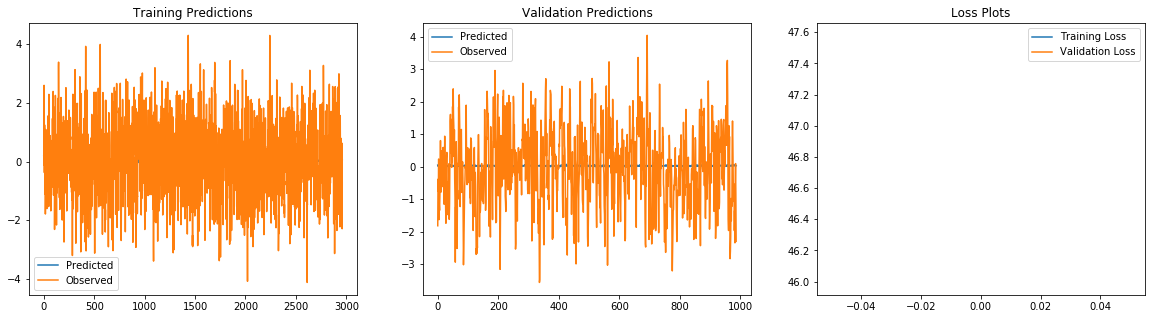

Epoch: 5 Train: 45.72569 Val: 47.58972  Time: 16.428  Best Val: 47.54156
Epoch: 10 Train: 45.26750 Val: 47.63402  Time: 29.808  Best Val: 47.54156


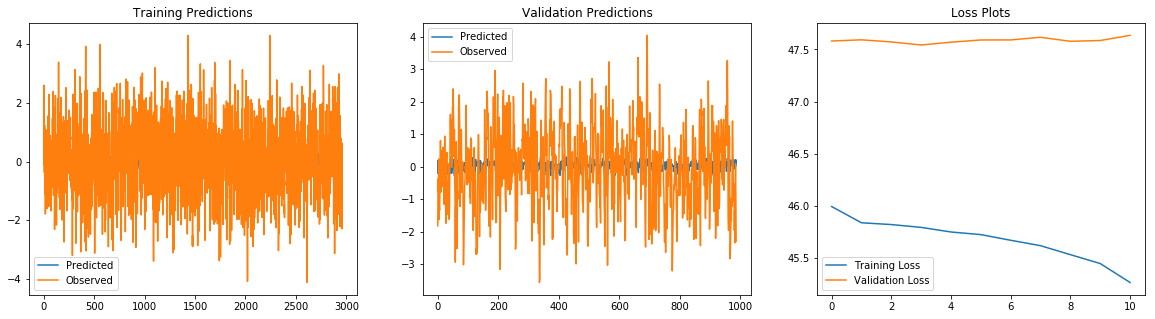

Epoch: 15 Train: 44.21908 Val: 48.32013  Time: 43.725  Best Val: 47.54156
Epoch: 20 Train: 42.63413 Val: 49.99370  Time: 56.995  Best Val: 47.54156


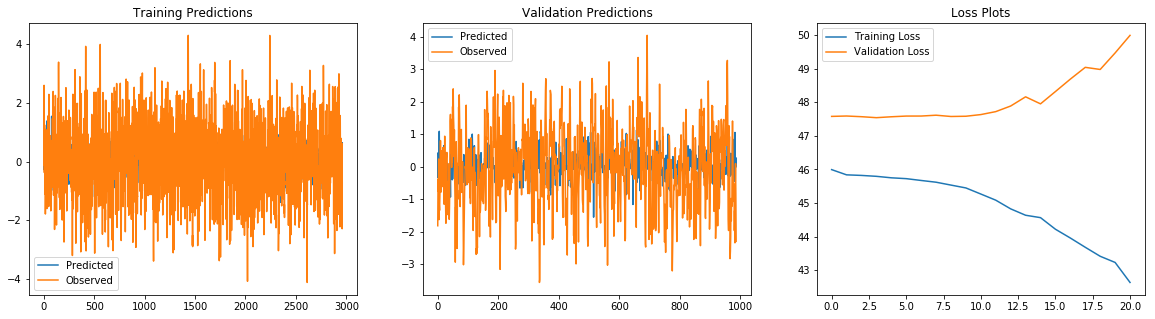

Epoch: 25 Train: 41.47257 Val: 49.90934  Time: 71.010  Best Val: 47.54156
Epoch: 30 Train: 40.69318 Val: 50.78590  Time: 84.129  Best Val: 47.54156


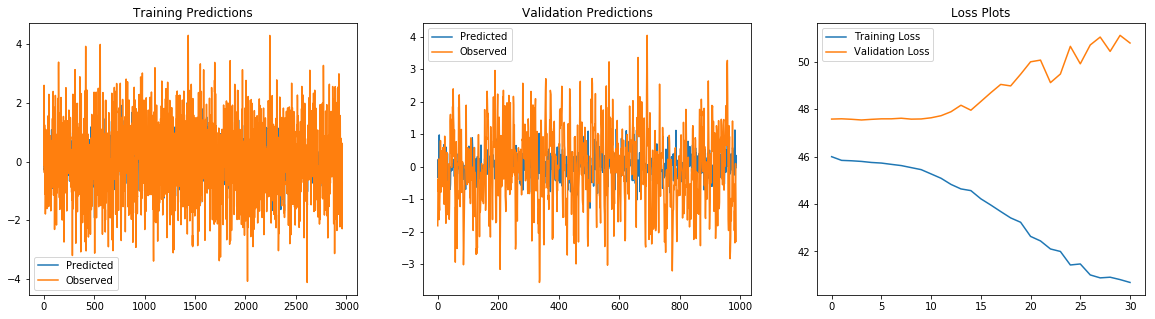

Epoch: 35 Train: 40.88708 Val: 50.47565  Time: 97.857  Best Val: 47.54156
Epoch: 40 Train: 39.11450 Val: 52.12808  Time: 111.161  Best Val: 47.54156


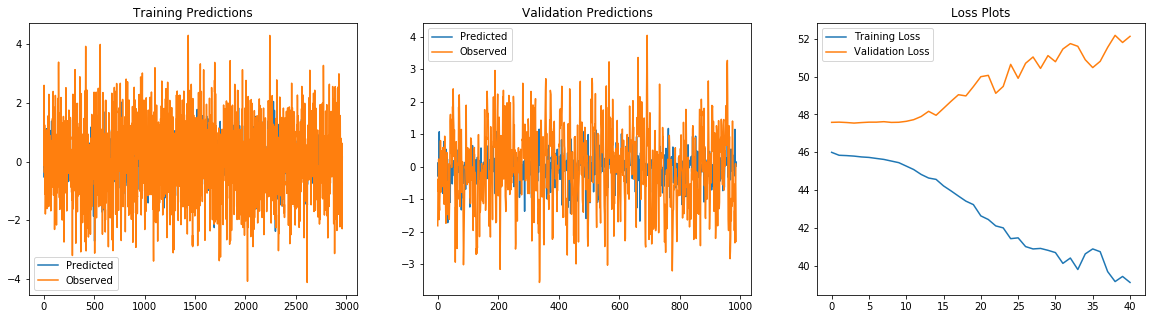

Epoch: 45 Train: 38.75486 Val: 53.00452  Time: 124.875  Best Val: 47.54156
Epoch: 50 Train: 40.99670 Val: 50.94584  Time: 138.024  Best Val: 47.54156


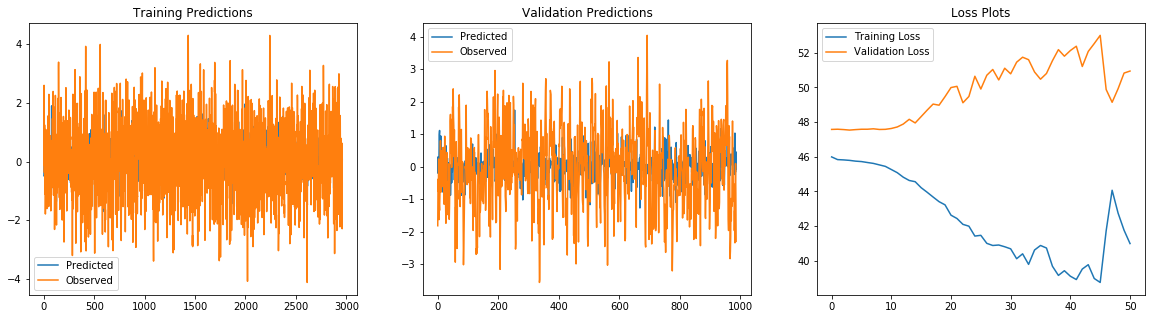

Epoch: 55 Train: 39.30574 Val: 51.12642  Time: 151.794  Best Val: 47.54156
Epoch: 60 Train: 38.70076 Val: 53.35022  Time: 165.103  Best Val: 47.54156


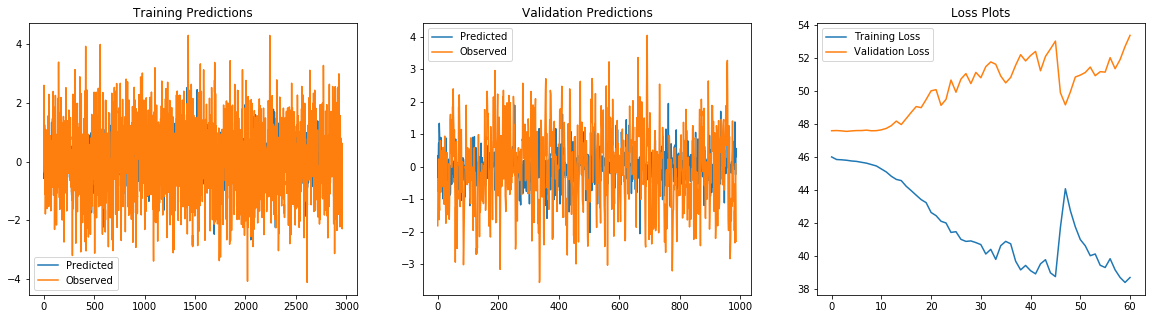

Epoch: 65 Train: 38.01018 Val: 53.17252  Time: 179.108  Best Val: 47.54156
Epoch: 70 Train: 37.81904 Val: 53.74878  Time: 192.251  Best Val: 47.54156


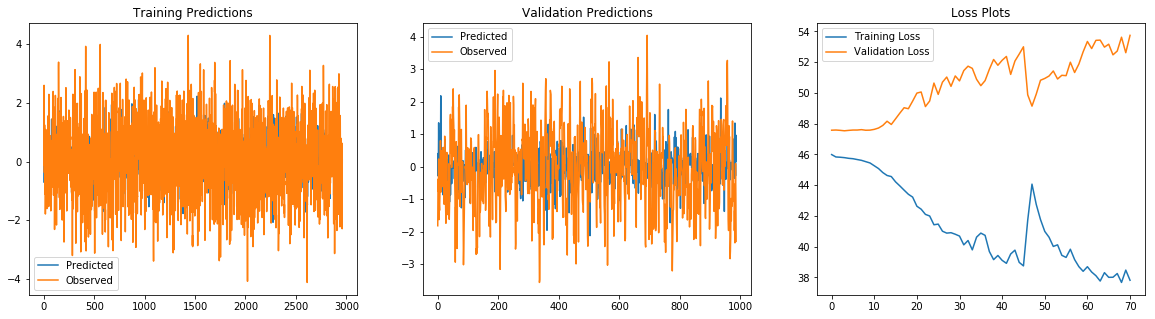

Epoch: 75 Train: 37.29251 Val: 53.04494  Time: 207.087  Best Val: 47.54156
Epoch: 80 Train: 38.26531 Val: 52.53226  Time: 221.700  Best Val: 47.54156


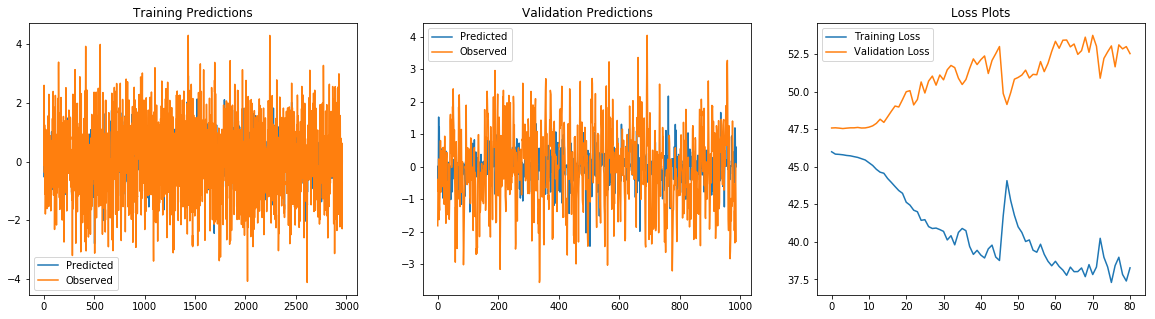

Epoch: 85 Train: 38.35171 Val: 53.31562  Time: 235.231  Best Val: 47.54156
Epoch: 90 Train: 38.27439 Val: 51.64270  Time: 248.464  Best Val: 47.54156


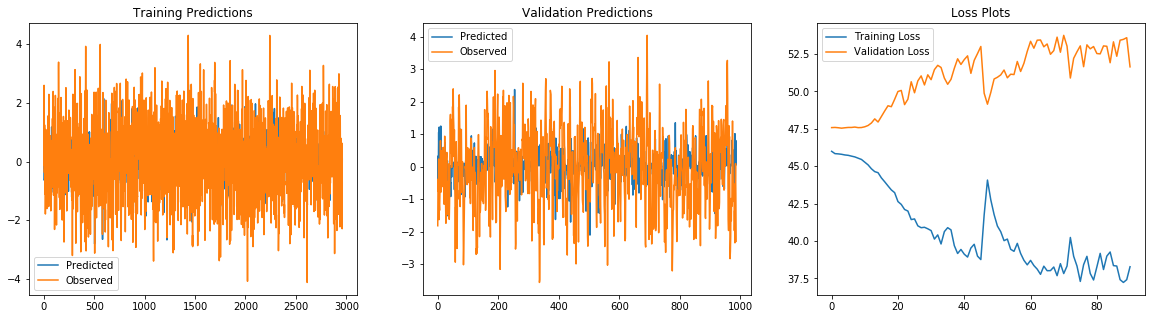

Epoch: 95 Train: 40.67794 Val: 51.42631  Time: 262.386  Best Val: 47.54156
Epoch: 100 Train: 39.18378 Val: 50.72813  Time: 275.620  Best Val: 47.54156


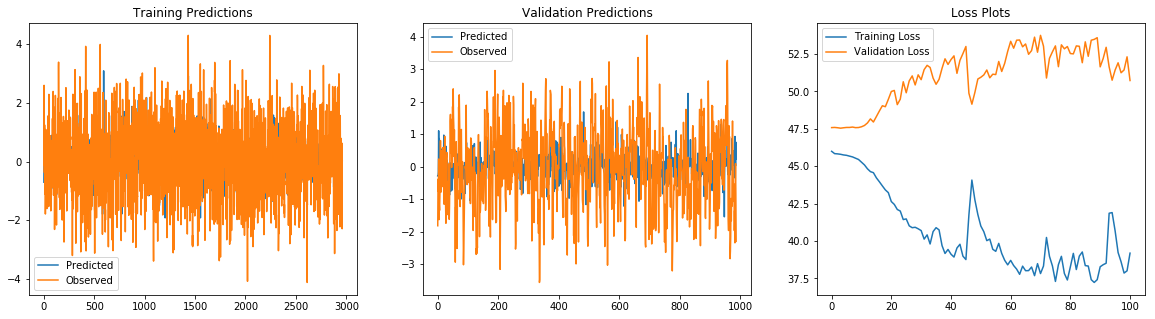

Epoch: 105 Train: 37.90470 Val: 52.44417  Time: 289.417  Best Val: 47.54156
Epoch: 110 Train: 36.98076 Val: 52.49750  Time: 302.635  Best Val: 47.54156


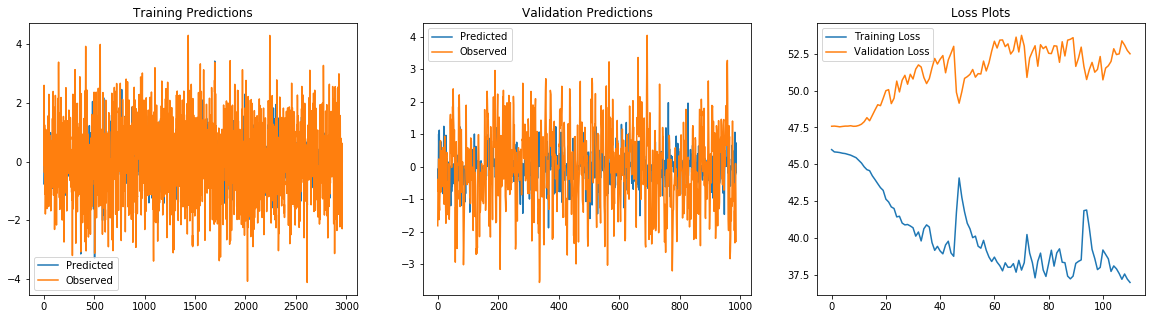

Epoch: 115 Train: 40.68656 Val: 51.95786  Time: 316.357  Best Val: 47.54156
Epoch: 120 Train: 43.19153 Val: 49.01822  Time: 329.756  Best Val: 47.54156


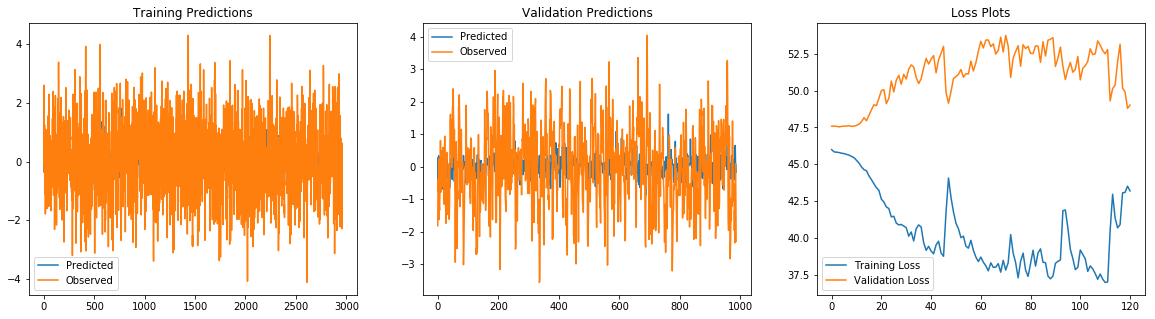

Epoch: 125 Train: 43.59108 Val: 49.21763  Time: 343.504  Best Val: 47.54156
Epoch: 130 Train: 42.34927 Val: 49.97262  Time: 356.728  Best Val: 47.54156


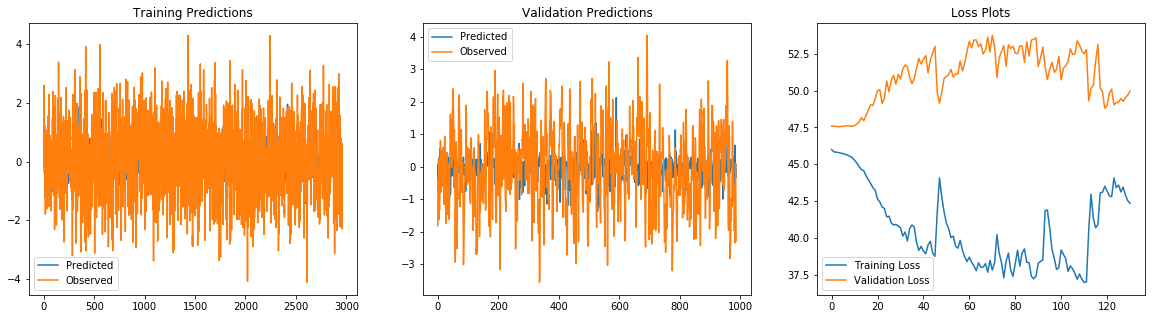

Epoch: 135 Train: 40.74276 Val: 50.62442  Time: 371.045  Best Val: 47.54156
Epoch: 140 Train: 40.17844 Val: 51.85993  Time: 385.848  Best Val: 47.54156


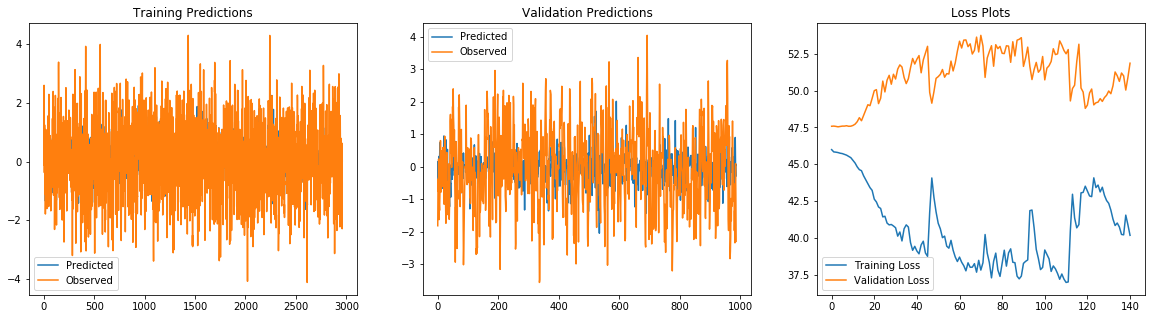

Epoch: 145 Train: 38.97742 Val: 52.66615  Time: 399.420  Best Val: 47.54156
Epoch: 150 Train: 38.24681 Val: 52.46985  Time: 412.760  Best Val: 47.54156


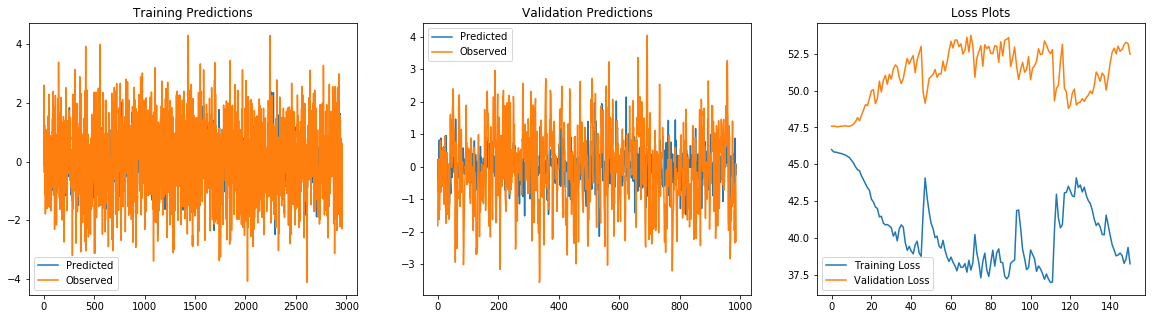

Epoch: 155 Train: 38.11738 Val: 52.85047  Time: 426.507  Best Val: 47.54156
Epoch: 160 Train: 37.48828 Val: 52.25230  Time: 439.676  Best Val: 47.54156


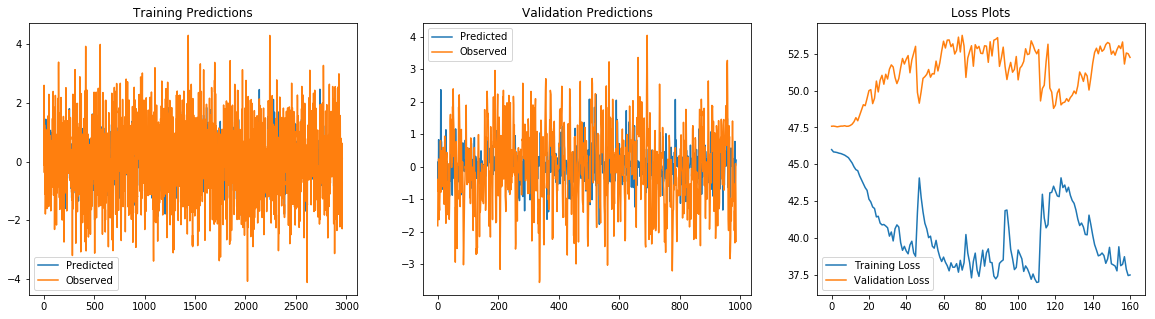

Epoch: 165 Train: 36.82657 Val: 53.08863  Time: 453.390  Best Val: 47.54156
Epoch: 170 Train: 37.18924 Val: 53.57225  Time: 466.533  Best Val: 47.54156


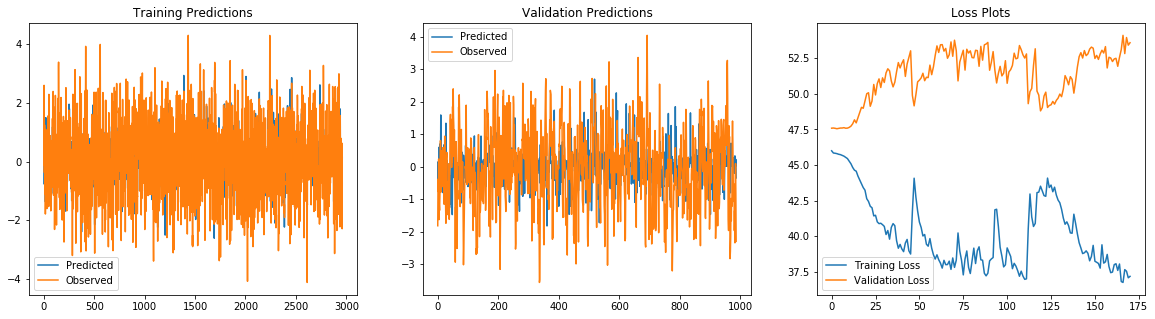

Epoch: 175 Train: 37.59518 Val: 53.57629  Time: 480.364  Best Val: 47.54156
Epoch: 180 Train: 39.24416 Val: 52.10794  Time: 493.638  Best Val: 47.54156


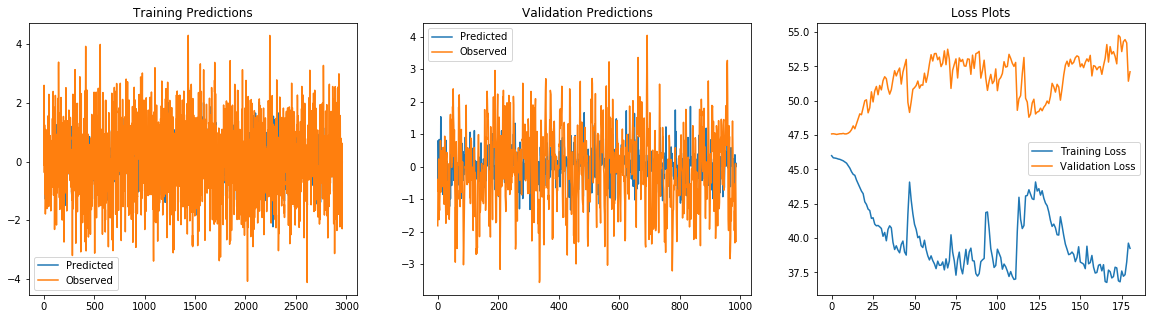

Epoch: 185 Train: 37.27871 Val: 53.39583  Time: 507.524  Best Val: 47.54156
Epoch: 190 Train: 37.65588 Val: 52.66286  Time: 520.683  Best Val: 47.54156


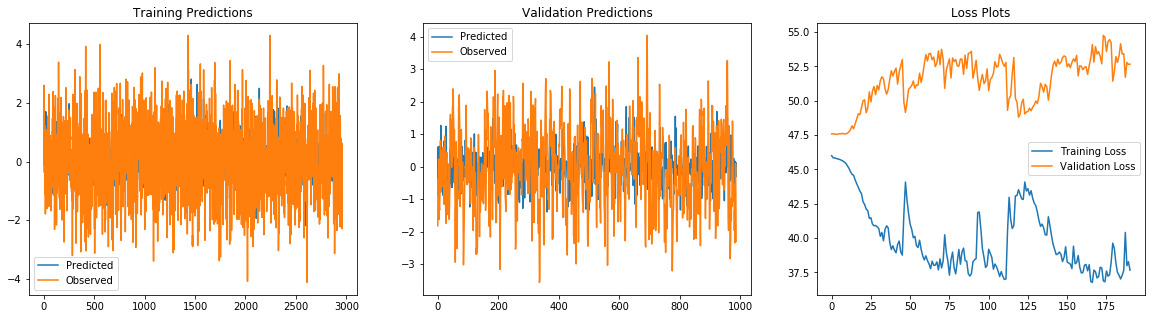

Epoch: 195 Train: 38.59938 Val: 52.12171  Time: 534.432  Best Val: 47.54156
Epoch: 200 Train: 39.85931 Val: 52.21294  Time: 547.688  Best Val: 47.54156


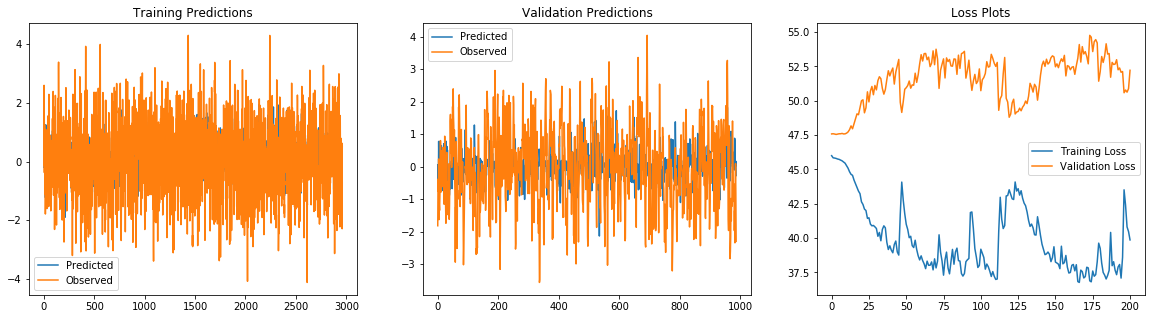

Epoch: 205 Train: 40.27024 Val: 52.24252  Time: 561.459  Best Val: 47.54156
Epoch: 210 Train: 39.72000 Val: 52.73302  Time: 574.866  Best Val: 47.54156


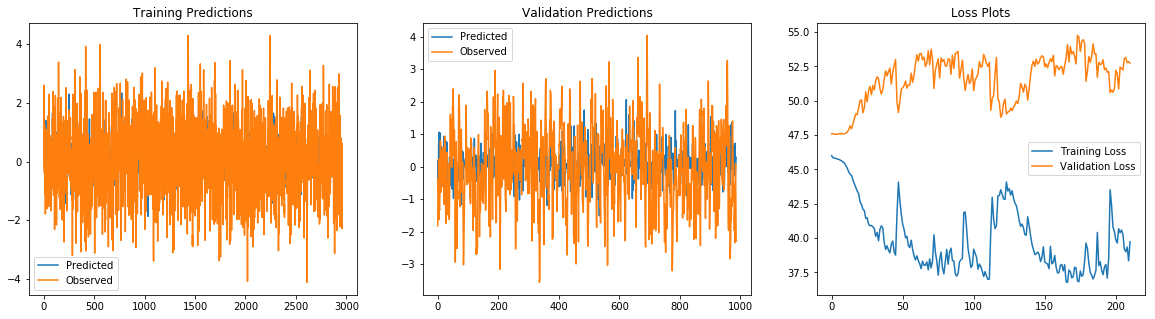

Epoch: 215 Train: 40.78531 Val: 51.87946  Time: 588.662  Best Val: 47.54156
Epoch: 220 Train: 40.15798 Val: 50.79168  Time: 601.965  Best Val: 47.54156


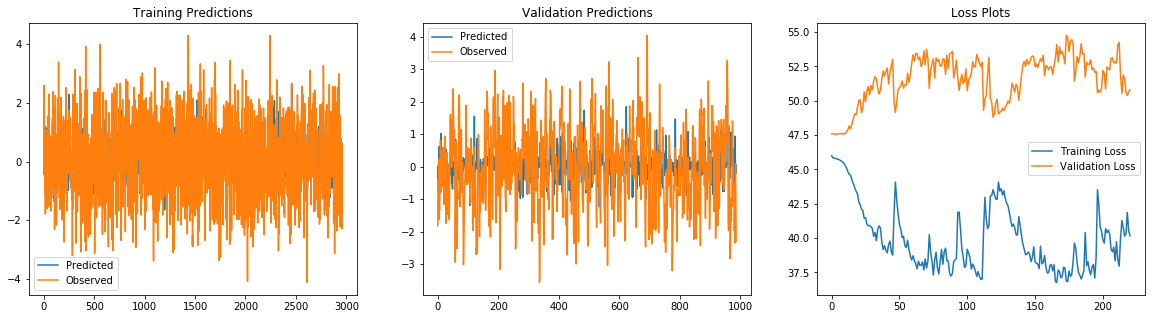

Epoch: 225 Train: 42.30899 Val: 49.62355  Time: 615.787  Best Val: 47.54156
Epoch: 230 Train: 43.95747 Val: 48.51612  Time: 628.968  Best Val: 47.54156


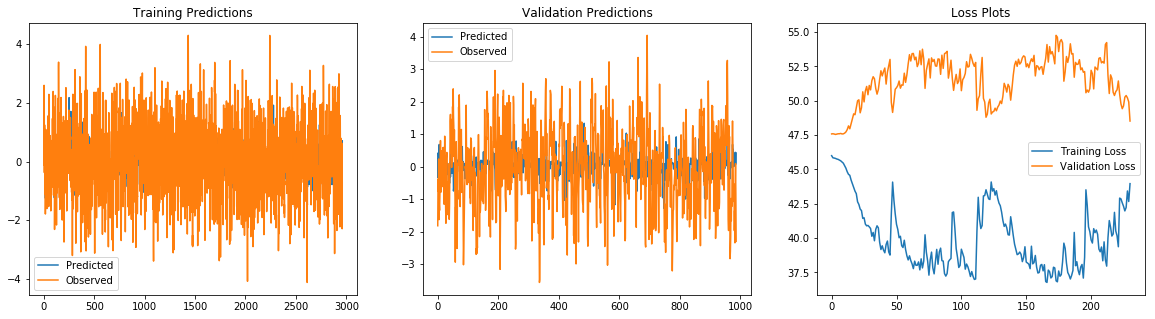

Epoch: 235 Train: 44.37855 Val: 49.52430  Time: 642.773  Best Val: 47.54156
Epoch: 240 Train: 44.86467 Val: 48.24656  Time: 656.100  Best Val: 47.54156


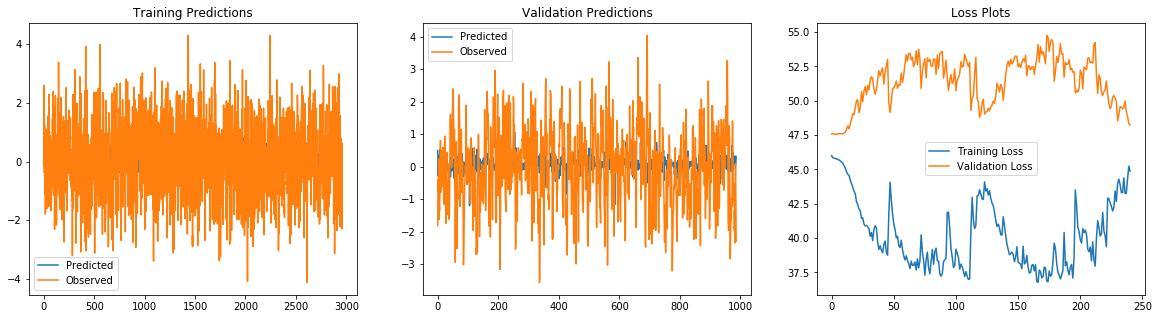

Epoch: 245 Train: 43.92523 Val: 49.01876  Time: 669.799  Best Val: 47.54156
Epoch: 250 Train: 43.40730 Val: 49.07684  Time: 683.059  Best Val: 47.54156


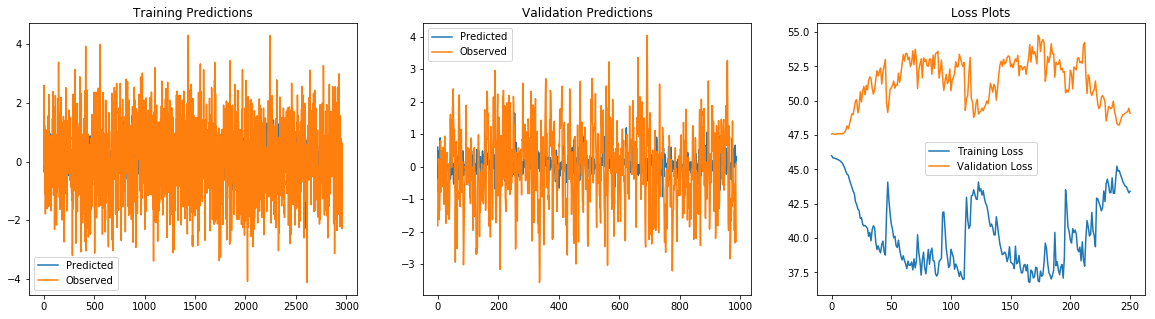

Epoch: 255 Train: 43.44733 Val: 49.07535  Time: 696.936  Best Val: 47.54156
Epoch: 260 Train: 45.03809 Val: 48.60886  Time: 711.015  Best Val: 47.54156


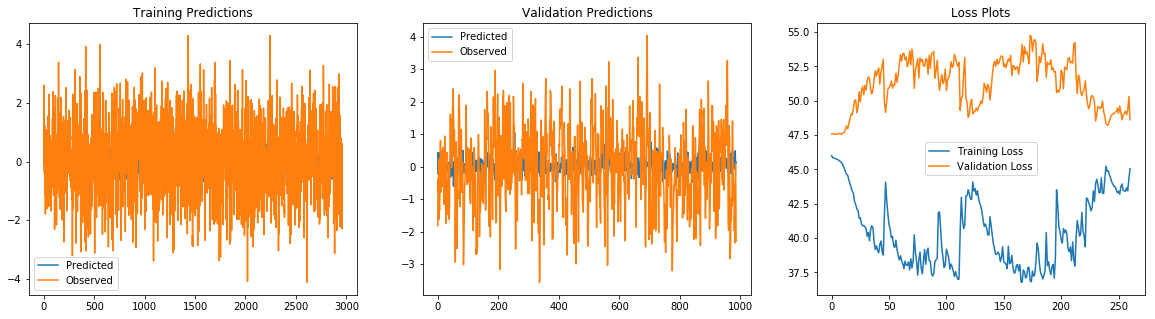

Epoch: 265 Train: 44.09454 Val: 49.73073  Time: 724.580  Best Val: 47.54156
Epoch: 270 Train: 44.31256 Val: 49.15305  Time: 737.680  Best Val: 47.54156


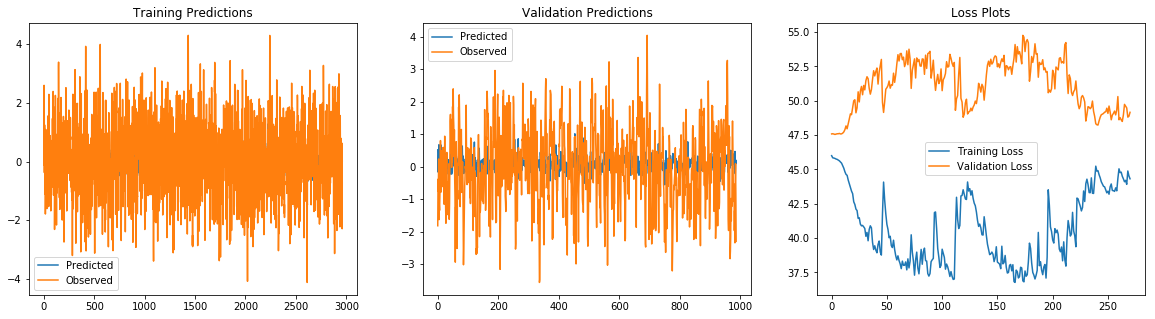

Epoch: 275 Train: 44.49831 Val: 49.44489  Time: 751.371  Best Val: 47.54156
Epoch: 280 Train: 44.44669 Val: 50.48565  Time: 764.708  Best Val: 47.54156


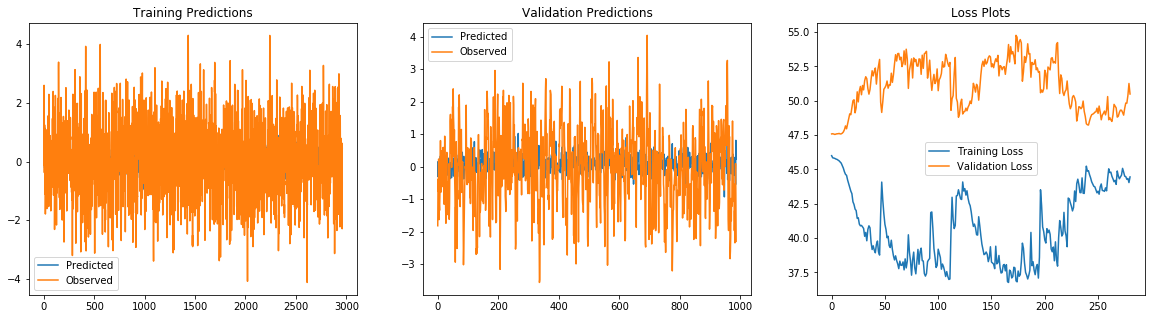

Epoch: 285 Train: 43.92979 Val: 50.37510  Time: 778.586  Best Val: 47.54156
Epoch: 290 Train: 43.52119 Val: 50.48872  Time: 792.035  Best Val: 47.54156


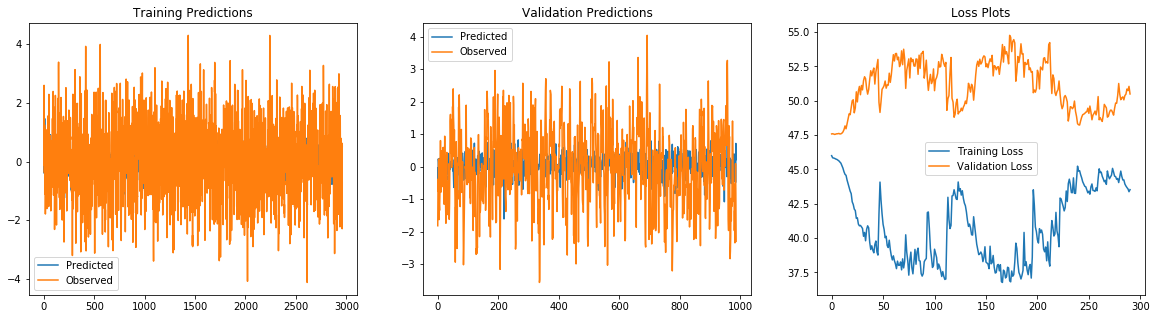

Epoch: 295 Train: 43.32890 Val: 50.09329  Time: 806.141  Best Val: 47.54156
Epoch: 300 Train: 42.49342 Val: 51.02906  Time: 819.355  Best Val: 47.54156


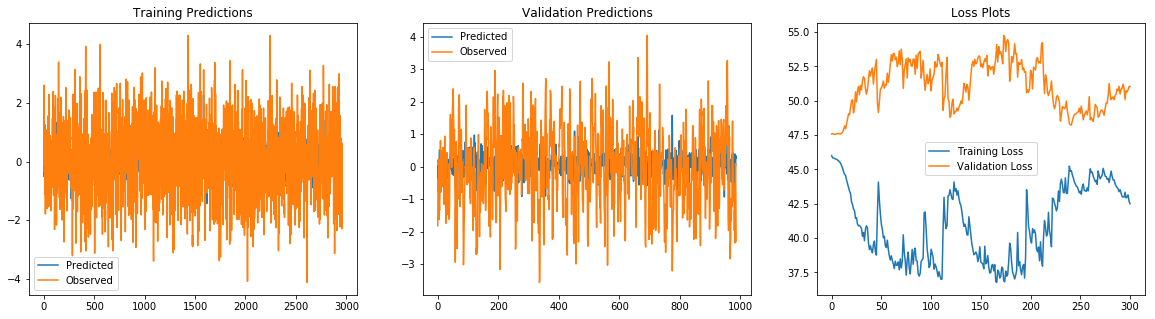

Epoch: 305 Train: 43.71894 Val: 49.17383  Time: 833.173  Best Val: 47.54156
Epoch: 310 Train: 43.45062 Val: 49.93288  Time: 846.303  Best Val: 47.54156


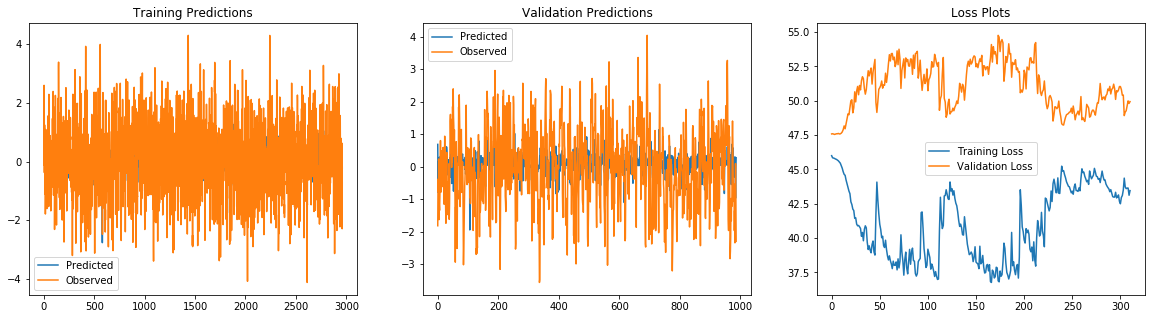

Epoch: 315 Train: 42.87187 Val: 49.92944  Time: 860.336  Best Val: 47.54156
Epoch: 320 Train: 41.63928 Val: 50.99056  Time: 873.605  Best Val: 47.54156


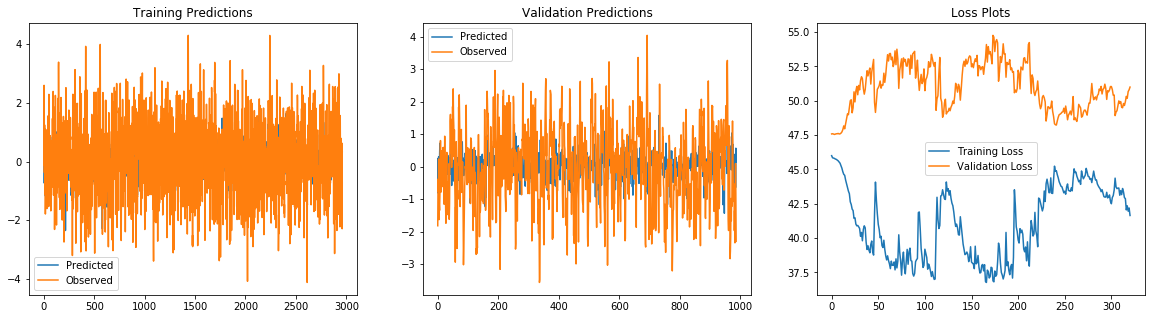

Epoch: 325 Train: 43.67248 Val: 49.86882  Time: 887.037  Best Val: 47.54156
Epoch: 330 Train: 42.92762 Val: 49.87847  Time: 900.181  Best Val: 47.54156


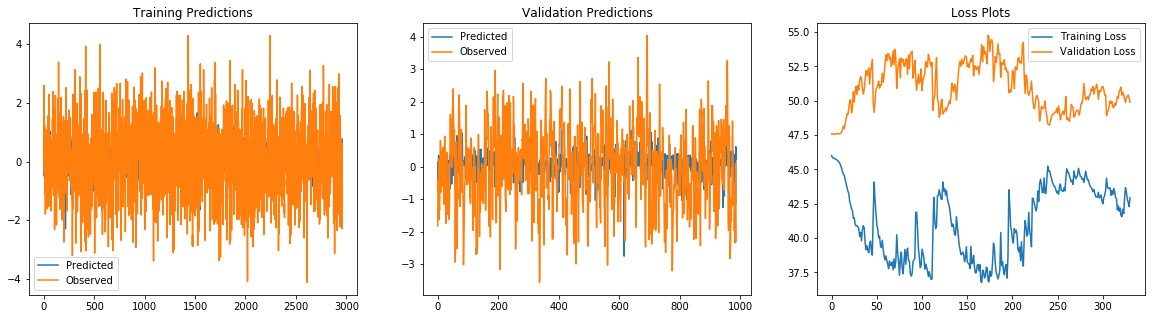

Epoch: 335 Train: 44.49013 Val: 48.89050  Time: 913.896  Best Val: 47.54156
Epoch: 340 Train: 43.84160 Val: 49.21581  Time: 927.231  Best Val: 47.54156


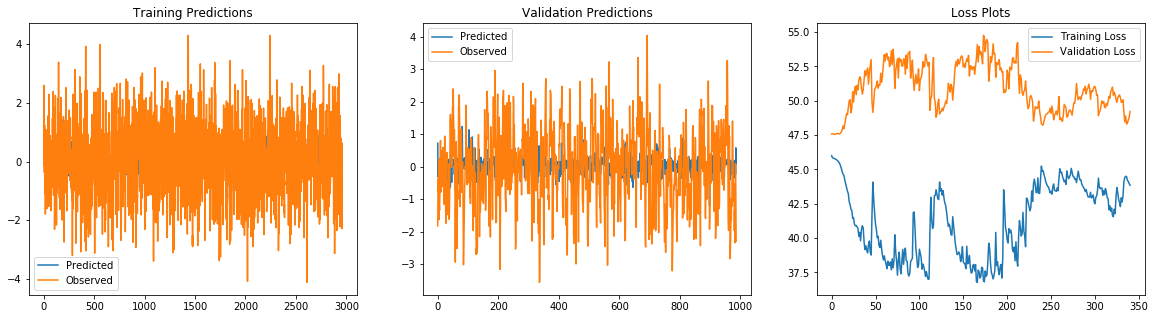

Epoch: 345 Train: 43.30212 Val: 48.91502  Time: 940.807  Best Val: 47.54156
Epoch: 350 Train: 43.01204 Val: 49.47757  Time: 953.980  Best Val: 47.54156


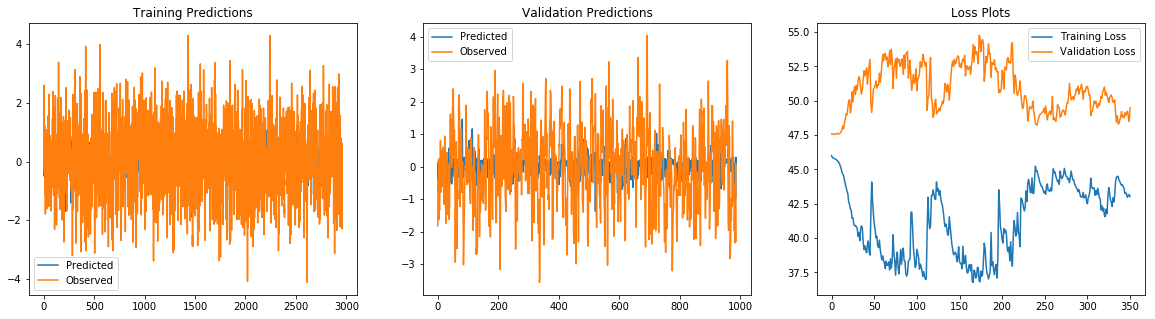

Epoch: 355 Train: 42.94426 Val: 49.31162  Time: 967.740  Best Val: 47.54156
Epoch: 360 Train: 42.30768 Val: 50.08235  Time: 980.901  Best Val: 47.54156


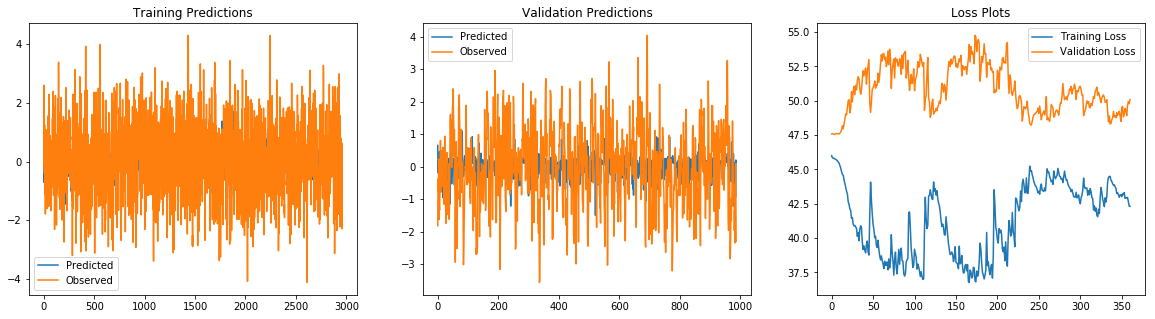

Epoch: 365 Train: 41.83572 Val: 50.23704  Time: 994.714  Best Val: 47.54156
Epoch: 370 Train: 42.20675 Val: 50.42383  Time: 1007.800  Best Val: 47.54156


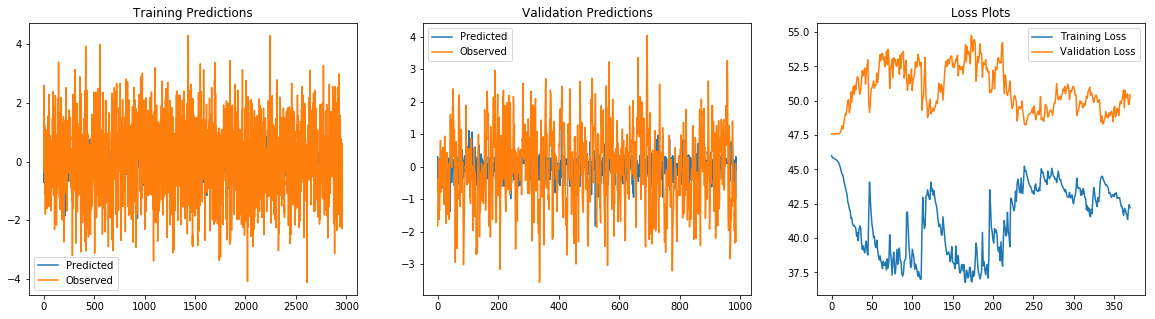

Epoch: 375 Train: 42.87213 Val: 49.95943  Time: 1021.751  Best Val: 47.54156
Epoch: 380 Train: 43.70918 Val: 49.88839  Time: 1035.372  Best Val: 47.54156


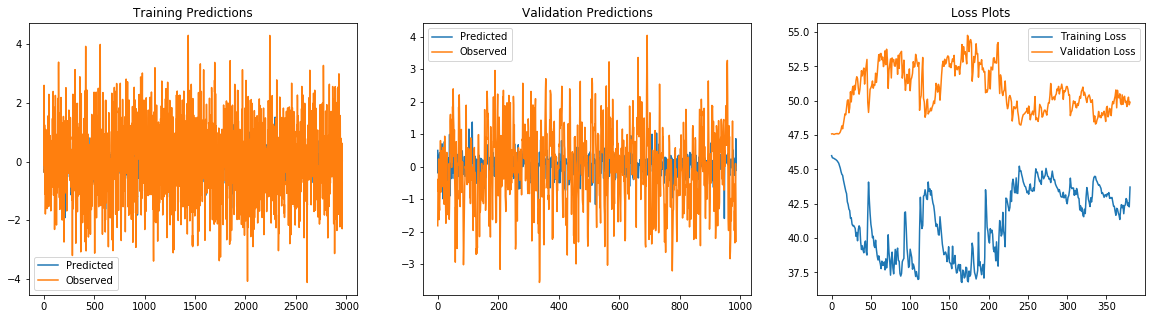

Epoch: 385 Train: 44.06854 Val: 48.78679  Time: 1049.325  Best Val: 47.54156
Epoch: 390 Train: 44.52834 Val: 48.07590  Time: 1062.434  Best Val: 47.54156


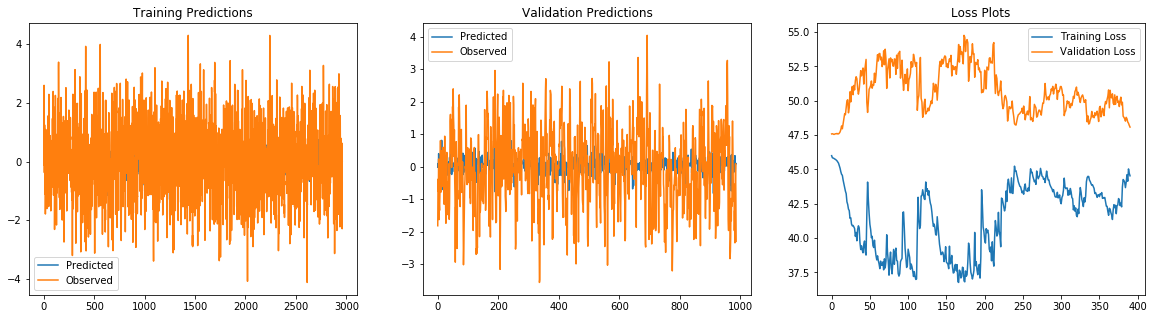

Epoch: 395 Train: 44.16119 Val: 48.33269  Time: 1076.277  Best Val: 46.92174
Epoch: 400 Train: 44.21565 Val: 47.97307  Time: 1089.400  Best Val: 46.92174


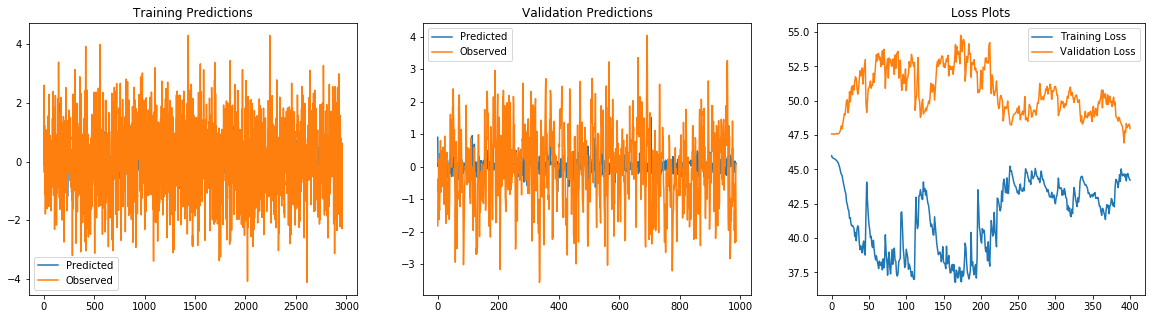

Epoch: 405 Train: 44.09598 Val: 47.89147  Time: 1103.376  Best Val: 46.92174
Epoch: 410 Train: 43.85097 Val: 48.13119  Time: 1116.752  Best Val: 46.92174


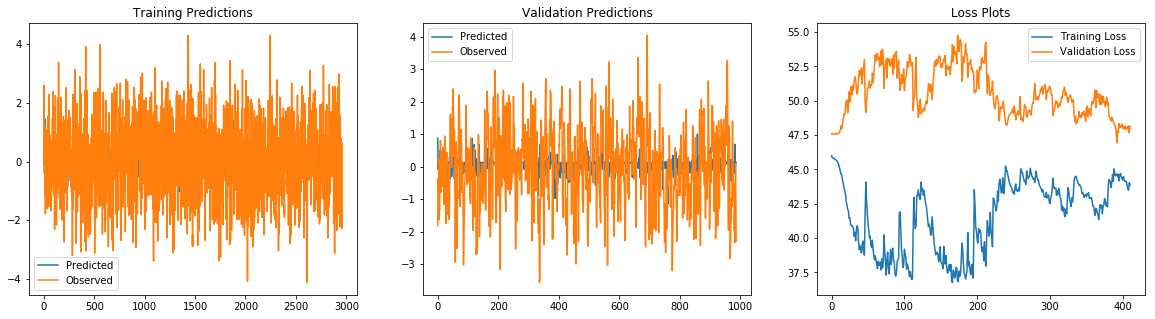

Epoch: 415 Train: 44.20985 Val: 48.20186  Time: 1130.301  Best Val: 46.92174
Epoch: 420 Train: 44.96372 Val: 47.86896  Time: 1143.550  Best Val: 46.92174


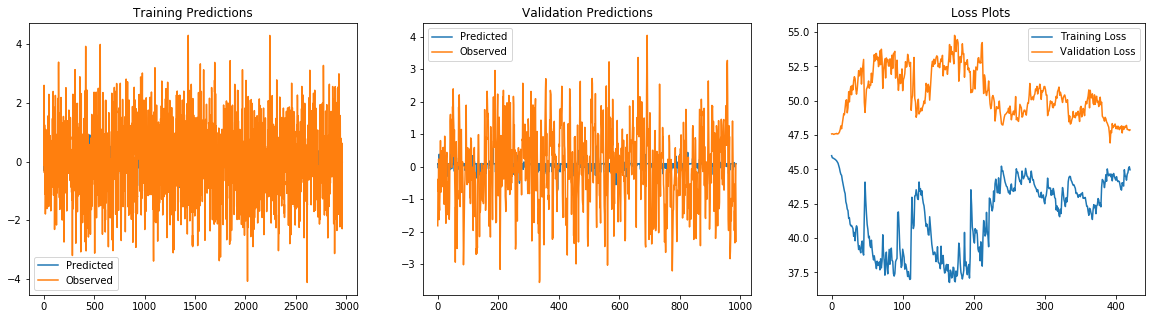

Epoch: 425 Train: 44.24506 Val: 48.12445  Time: 1157.420  Best Val: 46.92174
Epoch: 430 Train: 43.71151 Val: 48.28583  Time: 1170.773  Best Val: 46.92174


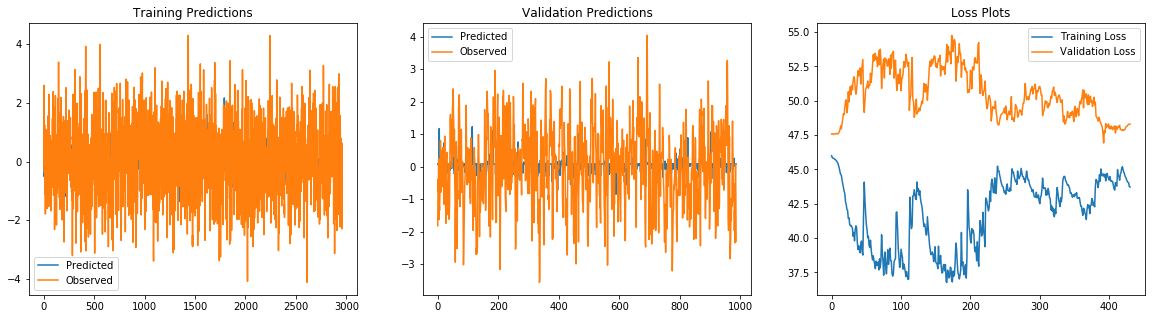

Epoch: 435 Train: 43.47011 Val: 48.22950  Time: 1184.774  Best Val: 46.92174
Epoch: 440 Train: 42.68329 Val: 48.32067  Time: 1197.912  Best Val: 46.92174


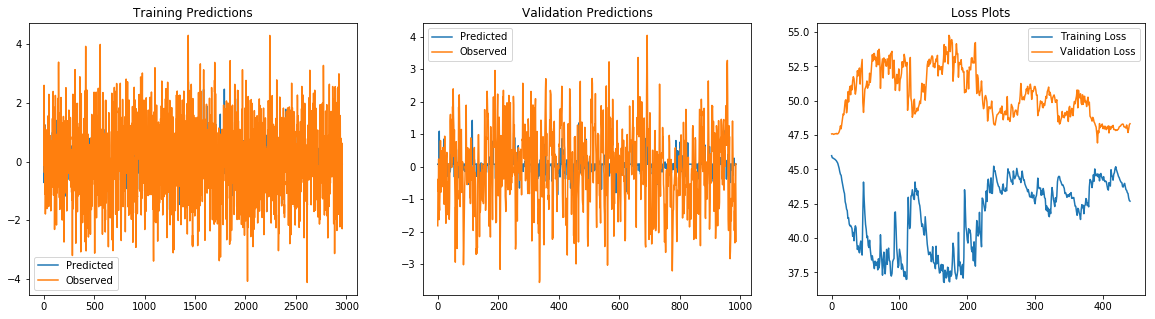

Epoch: 445 Train: 43.28361 Val: 48.89326  Time: 1211.647  Best Val: 46.92174
Epoch: 450 Train: 42.41802 Val: 49.07991  Time: 1224.726  Best Val: 46.92174


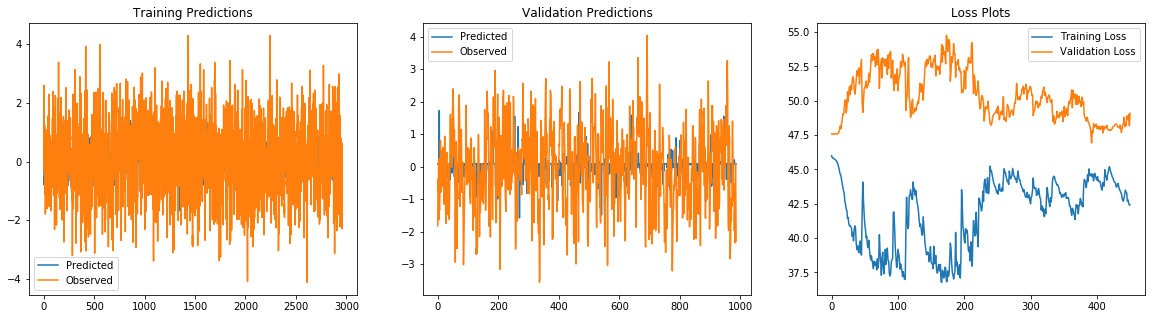

Epoch: 455 Train: 43.62700 Val: 48.63651  Time: 1238.269  Best Val: 46.92174
Epoch: 460 Train: 42.14897 Val: 48.87225  Time: 1251.309  Best Val: 46.92174


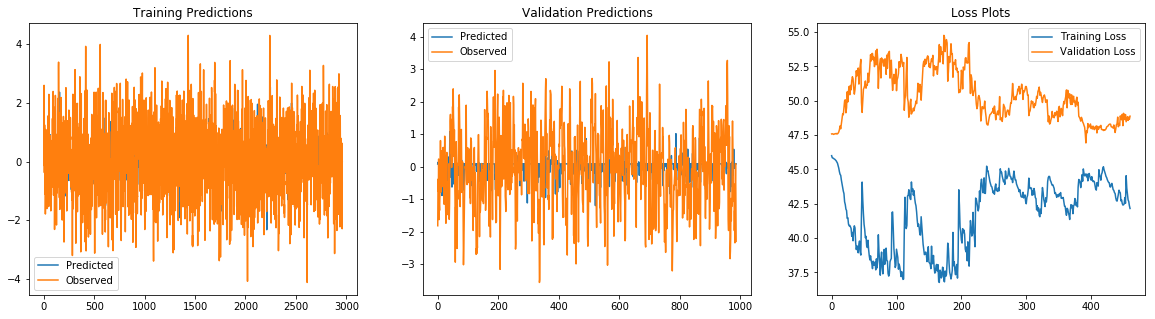

Epoch: 465 Train: 42.09517 Val: 49.57461  Time: 1265.075  Best Val: 46.92174
Epoch: 470 Train: 40.81164 Val: 49.45526  Time: 1278.290  Best Val: 46.92174


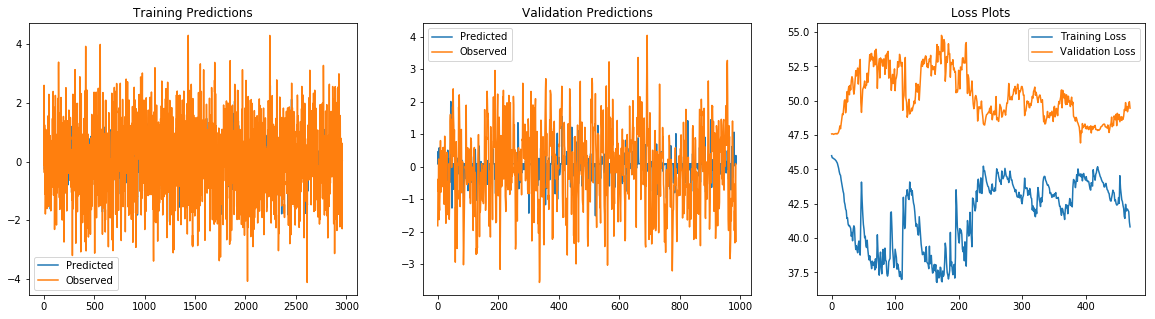

Epoch: 475 Train: 41.92822 Val: 48.88844  Time: 1291.676  Best Val: 46.92174
Epoch: 480 Train: 41.06837 Val: 48.46025  Time: 1304.488  Best Val: 46.92174


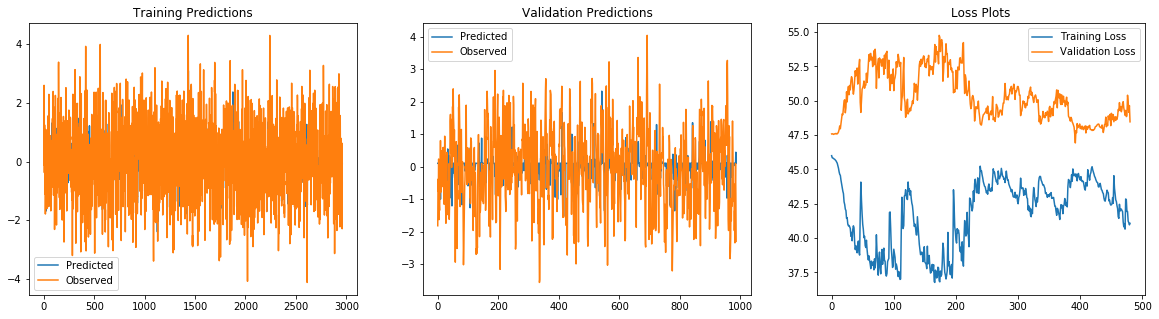

Epoch: 485 Train: 41.78894 Val: 49.97296  Time: 1318.313  Best Val: 46.92174
Epoch: 490 Train: 41.14472 Val: 50.79198  Time: 1331.548  Best Val: 46.92174


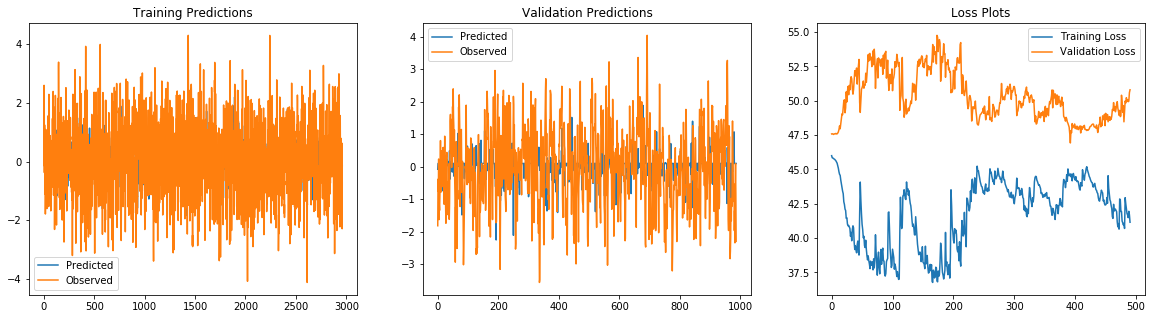

Epoch: 495 Train: 40.37863 Val: 51.14163  Time: 1345.653  Best Val: 46.92174
Epoch: 500 Train: 39.79899 Val: 49.53243  Time: 1358.988  Best Val: 46.92174


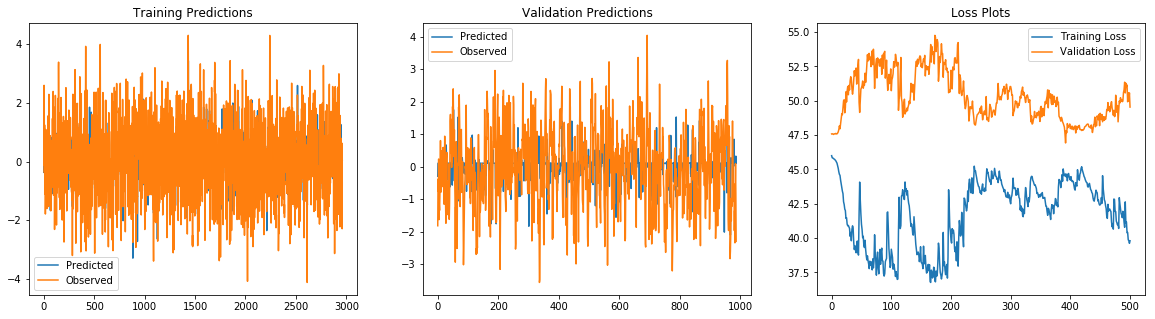

Epoch: 505 Train: 42.78005 Val: 49.48115  Time: 1372.306  Best Val: 46.92174
Epoch: 510 Train: 44.06620 Val: 48.40164  Time: 1385.429  Best Val: 46.92174


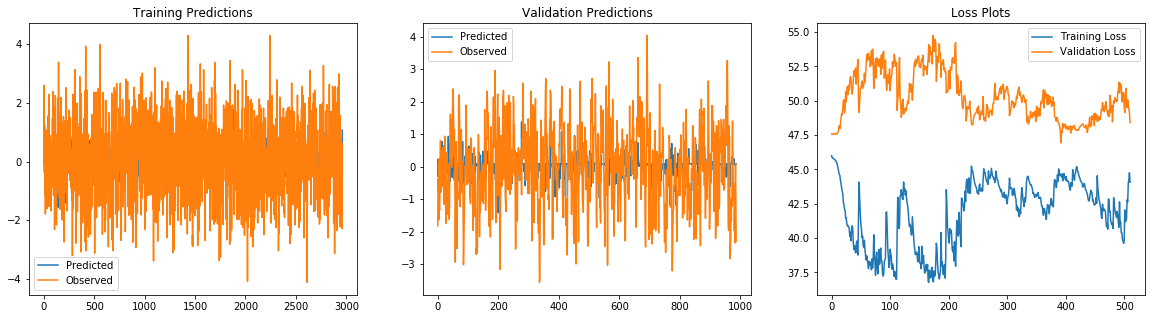

Epoch: 515 Train: 44.13121 Val: 48.37372  Time: 1399.166  Best Val: 46.92174
Epoch: 520 Train: 43.14426 Val: 49.32379  Time: 1412.302  Best Val: 46.92174


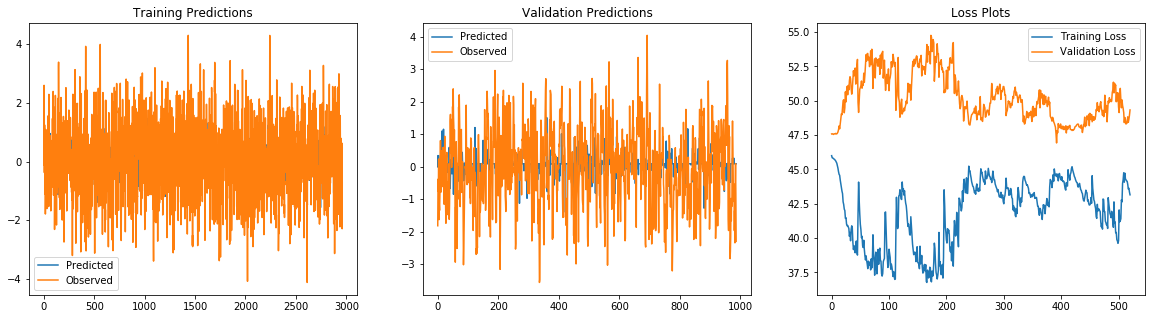

Epoch: 525 Train: 43.57675 Val: 48.51908  Time: 1426.218  Best Val: 46.92174
Epoch: 530 Train: 42.96223 Val: 48.95953  Time: 1439.450  Best Val: 46.92174


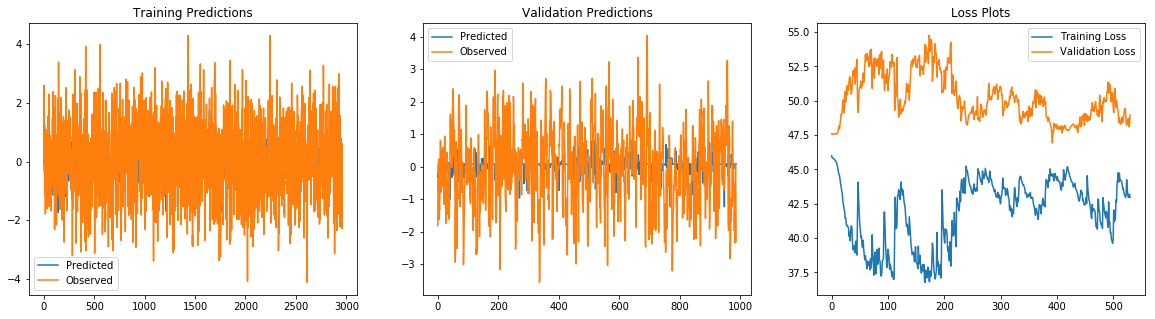

Epoch: 535 Train: 43.12651 Val: 48.36110  Time: 1453.016  Best Val: 46.92174
Epoch: 540 Train: 42.25628 Val: 49.01804  Time: 1465.883  Best Val: 46.92174


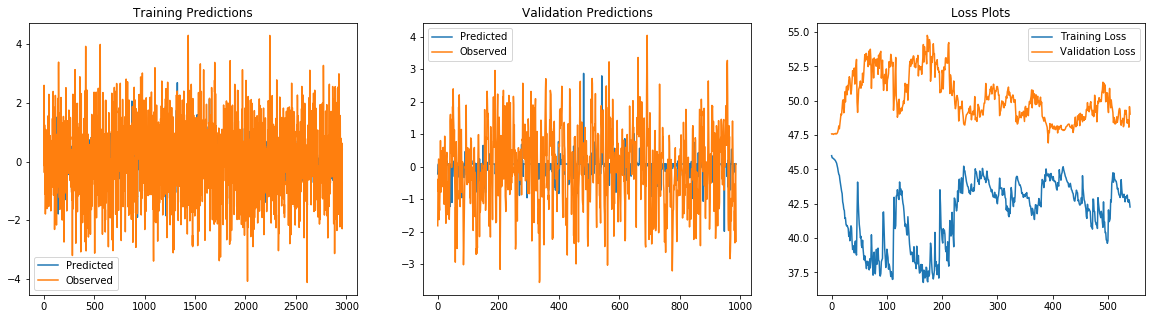

Epoch: 545 Train: 43.68209 Val: 49.53395  Time: 1479.569  Best Val: 46.92174
Epoch: 550 Train: 43.37981 Val: 49.25151  Time: 1492.687  Best Val: 46.92174


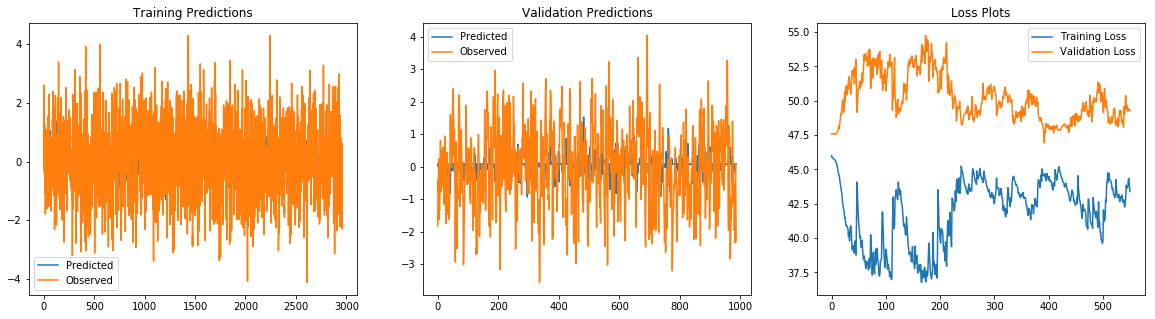

Epoch: 555 Train: 45.17732 Val: 48.39415  Time: 1506.500  Best Val: 46.92174
Epoch: 560 Train: 45.52655 Val: 48.34005  Time: 1519.531  Best Val: 46.92174


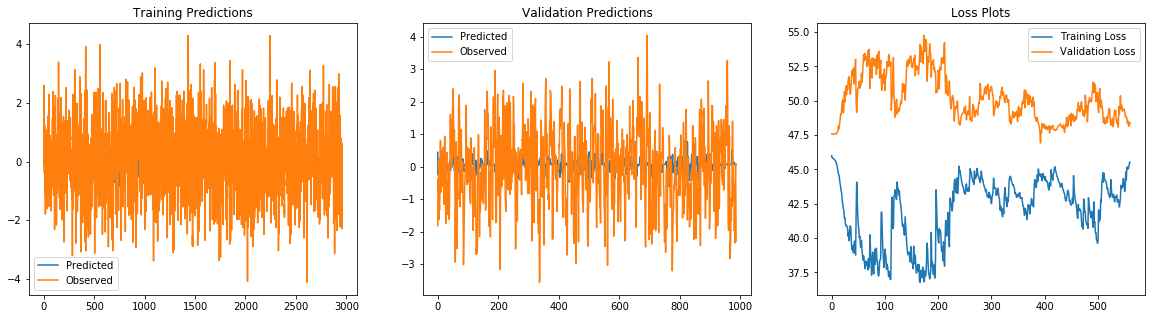

Epoch: 565 Train: 45.10548 Val: 47.96640  Time: 1533.176  Best Val: 46.92174
Epoch: 570 Train: 44.75149 Val: 47.97508  Time: 1546.286  Best Val: 46.92174


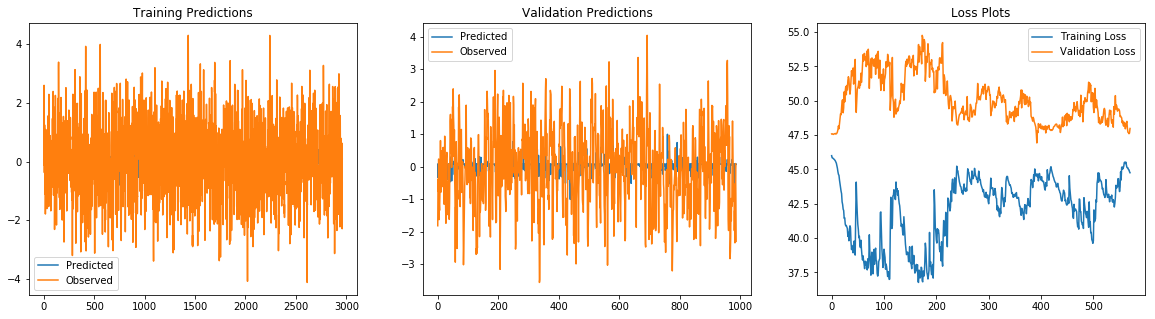

Epoch: 575 Train: 44.78795 Val: 47.66806  Time: 1559.869  Best Val: 46.92174
Epoch: 580 Train: 45.56367 Val: 48.58663  Time: 1573.121  Best Val: 46.92174


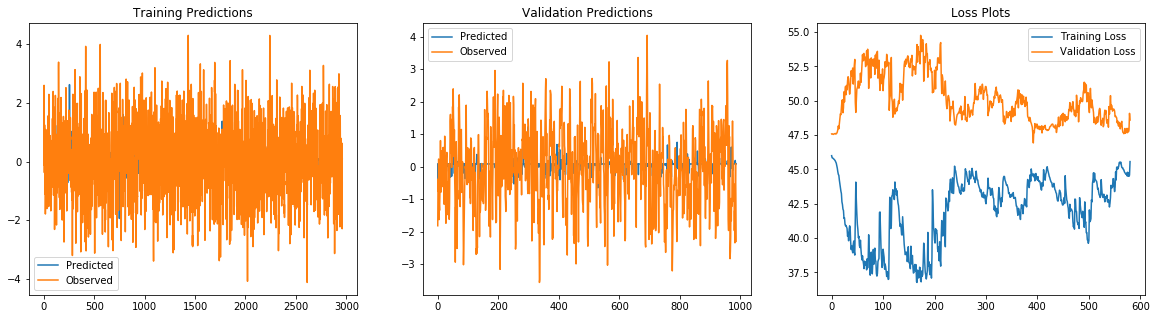

Epoch: 585 Train: 45.09484 Val: 47.78314  Time: 1586.815  Best Val: 46.92174
Epoch: 590 Train: 45.25541 Val: 47.64797  Time: 1599.772  Best Val: 46.92174


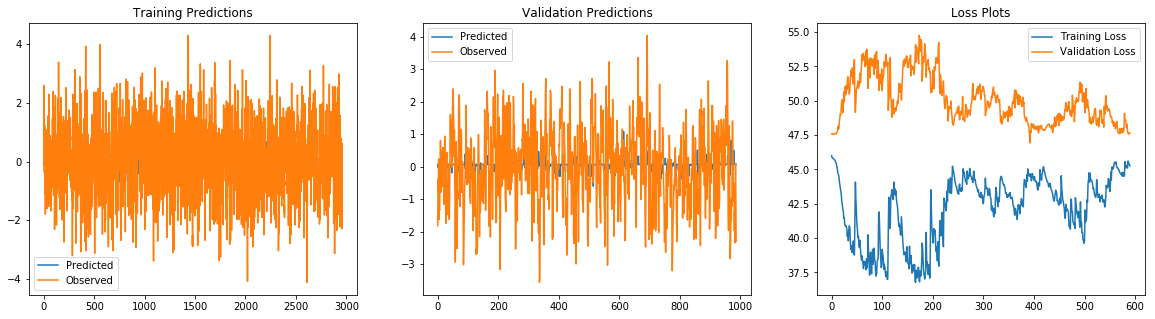

Epoch: 595 Train: 45.12372 Val: 47.55850  Time: 1613.376  Best Val: 46.92174
Epoch: 600 Train: 44.99180 Val: 47.84178  Time: 1626.365  Best Val: 46.92174


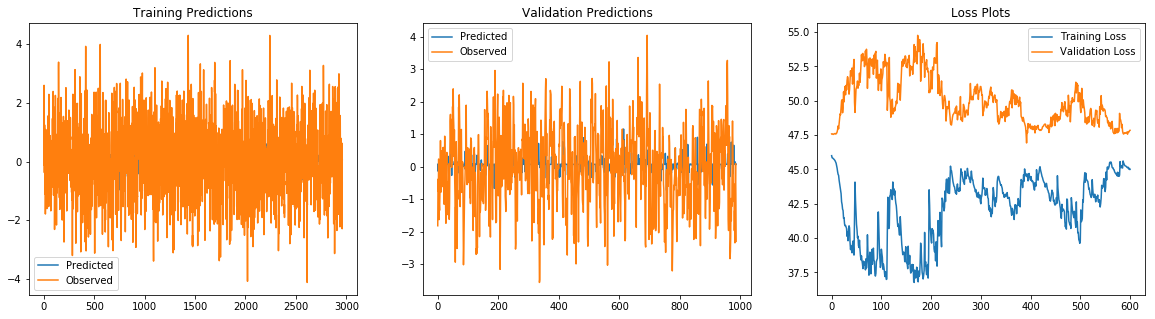

Epoch: 605 Train: 44.89559 Val: 48.12392  Time: 1640.083  Best Val: 46.92174
Epoch: 610 Train: 44.68812 Val: 48.16691  Time: 1653.225  Best Val: 46.92174


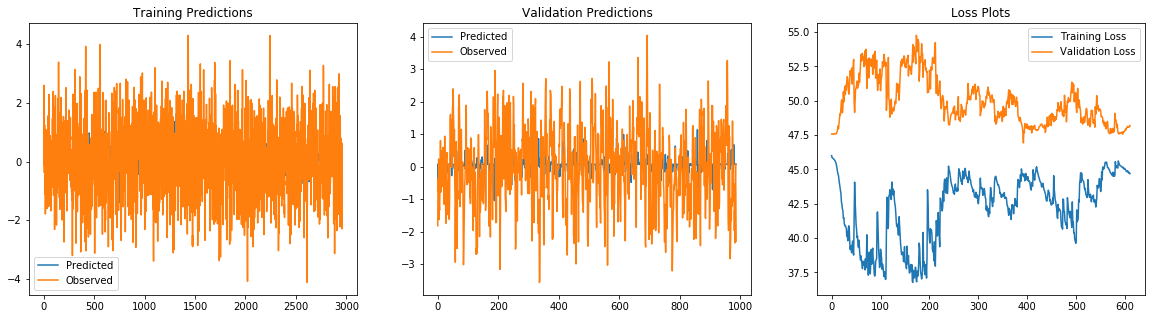

Epoch: 615 Train: 44.79196 Val: 48.34222  Time: 1667.053  Best Val: 46.92174
Epoch: 620 Train: 44.73902 Val: 48.45816  Time: 1680.093  Best Val: 46.92174


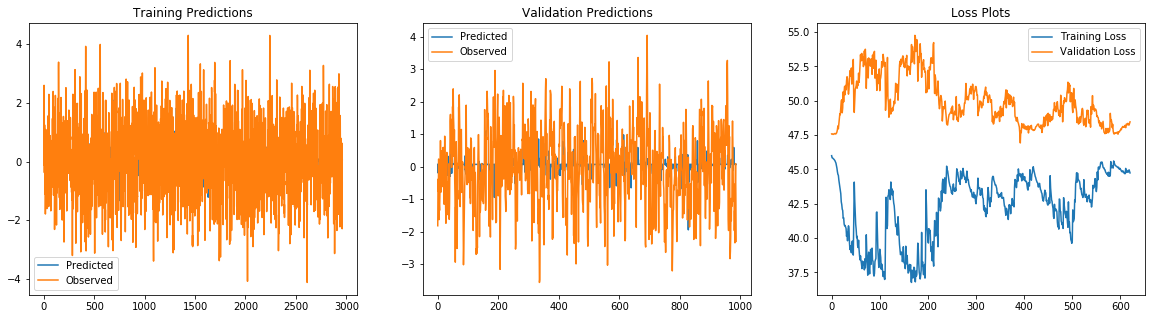

Epoch: 625 Train: 44.51909 Val: 48.35648  Time: 1693.544  Best Val: 46.92174
Epoch: 630 Train: 44.35403 Val: 49.38003  Time: 1706.427  Best Val: 46.92174


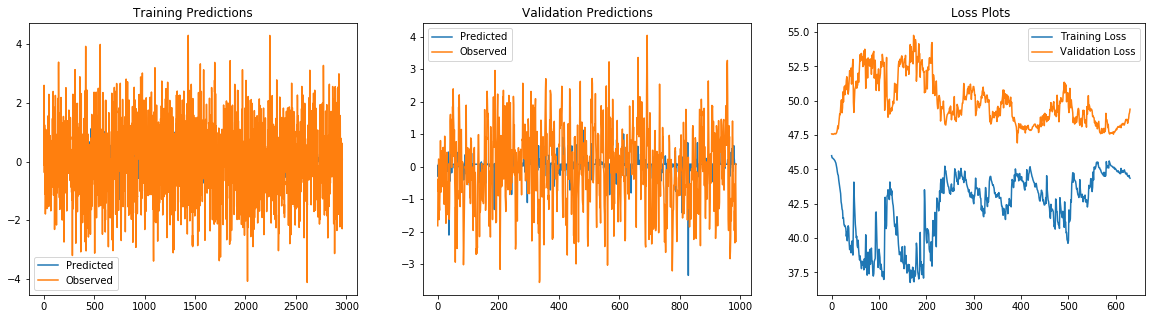

Epoch: 635 Train: 44.32899 Val: 49.40017  Time: 1719.873  Best Val: 46.92174
Epoch: 640 Train: 43.98387 Val: 49.71227  Time: 1733.150  Best Val: 46.92174


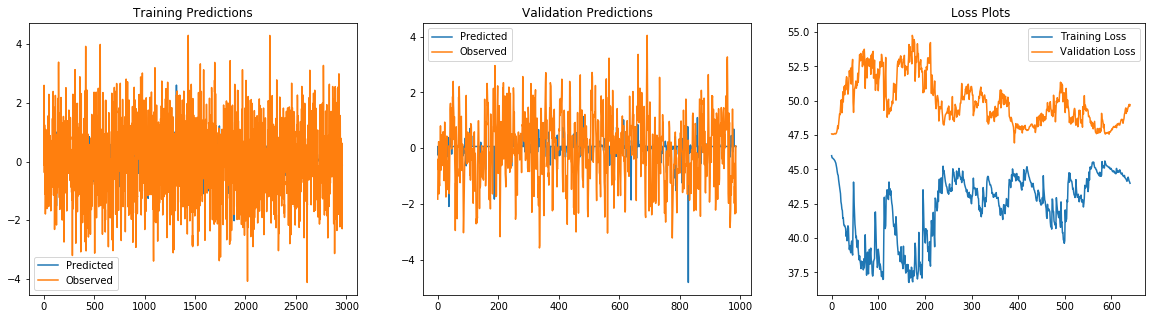

Epoch: 645 Train: 44.93818 Val: 48.09810  Time: 1746.597  Best Val: 46.92174
Epoch: 650 Train: 45.08484 Val: 48.57523  Time: 1759.734  Best Val: 46.92174


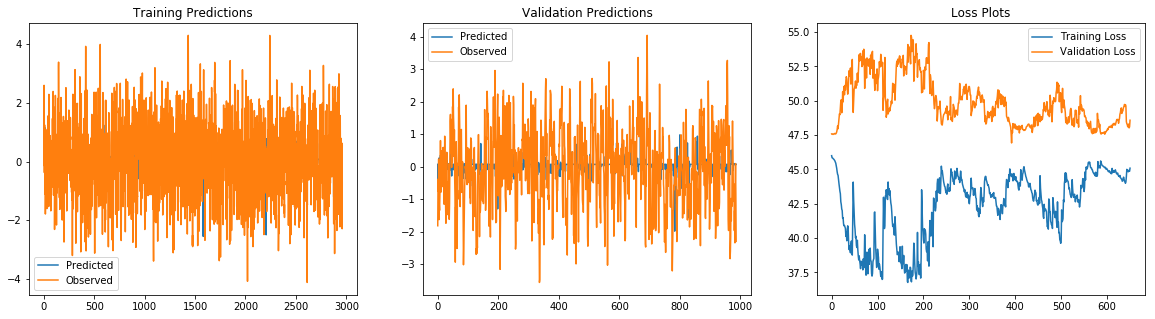

Epoch: 655 Train: 44.97088 Val: 48.26788  Time: 1773.516  Best Val: 46.92174
Epoch: 660 Train: 45.48865 Val: 47.00943  Time: 1786.618  Best Val: 46.86645


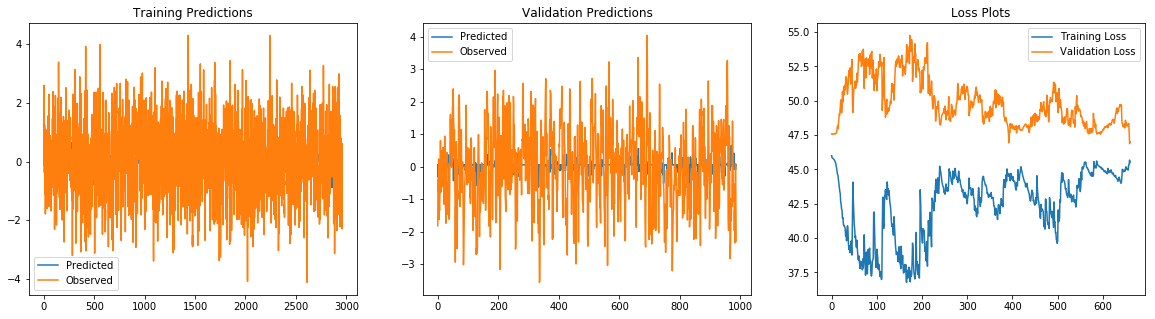

Epoch: 665 Train: 45.22318 Val: 47.27786  Time: 1800.350  Best Val: 46.86645


In [ ]:
# Allows for continious training by resetting the patience counter
learning.disp_freq=5
learning.n_epochs = 1000
learning.patience = 1000
learning.early.stop = False
learning.early.counter = 0
learning.training_wrapper()

### Evaluating on best model

In [ ]:
learning.evaluate(learning.best_model, learning.test_loader)

In [ ]:
# Observed
train_true = learning.y_train.numpy()
val_true  = learning.y_val.numpy()
test_true  = learning.y_test.numpy()

# Predicted
train_pred = np.array(learning.train_predictions)
val_pred  = np.array(learning.val_predictions)
test_pred = np.array(learning.test_predictions)

### Plotting

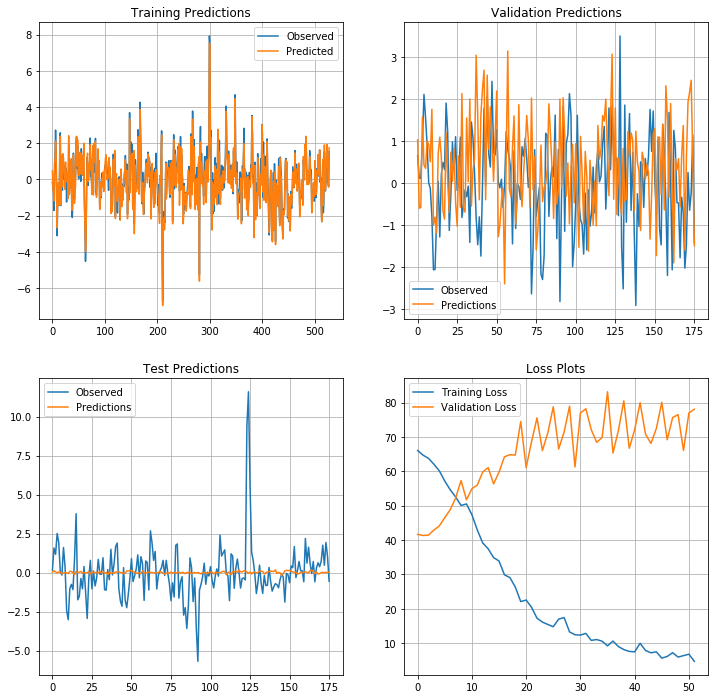

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].set_title("Training Predictions")
ax[0, 0].plot(train_true, label="Observed")
ax[0, 0].plot(train_pred, label="Predicted")
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].grid()
ax[0, 1].set_title("Validation Predictions")
ax[0, 1].plot(val_true, label="Observed")
ax[0, 1].plot(val_pred, label="Predictions")
ax[0, 1].legend()

ax[1, 0].grid()
ax[1, 0].set_title("Test Predictions")
ax[1, 0].plot(test_true, label="Observed")
ax[1, 0].plot(test_pred, label="Predictions")
ax[1, 0].legend()

ax[1, 1].grid()
ax[1, 1].set_title("Loss Plots")
ax[1, 1].plot(learning.logs['Training Loss'], label="Training Loss")
ax[1, 1].plot(learning.logs['Validation Loss'], label="Validation Loss")
ax[1, 1].legend()

epoch_reached = str(len(learning.logs['Training Loss']))
path = "Results/Plots/"
val_loss = learning.best_val_score

plt.show()

In [127]:
mse, mae, mda = evaluate(test_pred, test_true, log_ret=False)
print("Price Metrics: ", 
      mse, mae, mda)

Price Metrics:  3.0719313989202592 1.1115117486677428 0.4742857142857143


### Comparing to benchmark

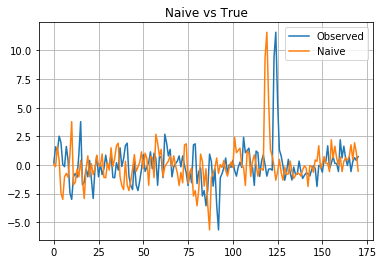

In [129]:
naive_pred = test_true[forecast_length:]

plt.plot(test_true[:-forecast_length] ,label="Observed")
plt.plot(naive_pred, label="Naive")
plt.title("Naive vs True")
plt.grid()
plt.legend()
plt.show()

In [130]:
mse_naive, mae_naive, mda_naive = evaluate(naive_pred, test_true[:-forecast_length], log_ret=False)
print("naive",
    mse_naive, mae_naive, mda_naive)

naive 6.473646 1.6384134 0.4588235294117647


In [131]:
print("For Mean Squared Error:")

if mse_naive < mse:
    print("Naive Wins")
else:
    print("LSTM Wins")
    
print("For Mean Absolute Error:")

if mae_naive < mae:
    print("Naive Wins")
else:
    print("LSTM Wins")
    
print("For Mean Directional Accuracy:")

if mda_naive > mda:
    print("Naive Wins")
else:
    print("LSTM Wins")

For Mean Squared Error:
LSTM Wins
For Mean Absolute Error:
LSTM Wins
For Mean Directional Accuracy:
LSTM Wins


In [4]:
from statsmodels.tsa.arima_model import ARMA

In [22]:
train = y[:800]
test = y[800:]

arma = ARMA(train, (3, 2)).fit()
arma_preds = arma.predict(start=1, end=200)

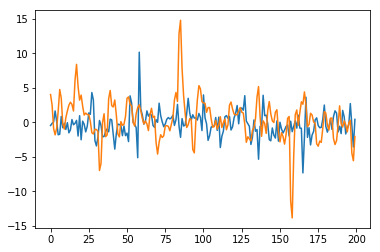

In [23]:
plt.plot(arma_preds)
plt.plot(test)
plt.show()

In [27]:
arma_preds = arma_preds.reshape(200, 1)

In [28]:
mse_arma, mae_arma, mda_arma = evaluate(arma_preds, test, log_ret=False)
print("ARMA", mse_arma, mae_arma, mda_arma)

ARMA 13.592715007336428 2.662496709063995 0.5025125628140703


In [29]:
print("For Mean Squared Error:")

if mse_arma < mse:
    print("ARMA Wins")
else:
    print("LSTM Wins")
    
print("For Mean Absolute Error:")

if mae_arma < mae:
    print("ARMA Wins")
else:
    print("LSTM Wins")
    
print("For Mean Directional Accuracy:")

if mda_arma > mda:
    print("ARMA Wins")
else:
    print("LSTM Wins")

For Mean Squared Error:


NameError: name 'mse' is not defined